# Supervised classification: Learning and assessment

### imports

In [1]:
from sklearn import datasets,naive_bayes
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from itertools import cycle
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
import matplotlib
import pylab as pl
import random
import numpy as np

### Loading Database

In [2]:

irisData = datasets.load_iris()

"""
    data
"""
print (irisData.data)

"""
    classes
"""
print (irisData.target)

"""
    The attributes
"""
print (irisData.feature_names)

"""
    Distribution of attributes in the table
"""
print (irisData.data.shape)

"""
    attribute and class of the 32 element
"""
print (irisData.data[31])
print (irisData.target[31])

"""
    the classes
"""
print (irisData.target_names)

"""
    number of instances per class
""" 
# def count(Data,x):
#     sum = 0
#     for i in Data:
#         if x == i:
#             sum +=1
#     return sum

# for i in [0,1,2]:
#     print(f"la class {i} a {count(irisData.target,i)} instances ! ")

print(Counter(irisData.target))



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### plotting data

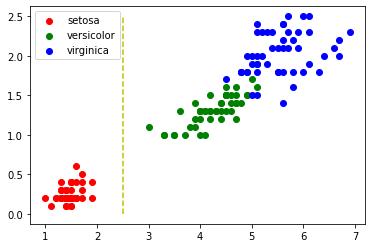

In [3]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    """
        iterator on many iterations :  first value of  i => first value of c => first value of target_names
    """
    for i, c, label in zip(target_ids, colors, target_names): 
        """
            choose the attributes to show on X and Y axis
        """
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)
    """
        showing the line that separates the class
    """
    pl.plot([2.5,2.5],[0,2.5],'y--')
    pl.legend()
    pl.show()

plot_2D(irisData.data, irisData.target, irisData.target_names)

### Clf Variable

In [4]:
clf = naive_bayes.MultinomialNB(fit_prior=True)  # Learning algorithm

clf_tree = DecisionTreeClassifier(random_state=0)

In [5]:
"""
    Training
"""

# clf.fit(irisData.data[:-1], irisData.target[:-1])

# clf_tree.fit(irisData.data[:-1], irisData.target[:-1])

"""
    Training on the entire dataset
"""

clf.fit(irisData.data[:], irisData.target[:])
clf_tree.fit(irisData.data[:], irisData.target[:])

"""
    Prediction on the last
"""

# p31 = clf.predict([irisData.data[31]])
# print(p31)
    
# plast = clf.predict([irisData.data[-1]])
# print(plast)

# ******************************

"""
    Training on a part and leaving a part 
    Error is at 100% because we are doing training on the 100 first instances and it dosn't know the other 50
    so it won't know  => we need to shuffle
"""

# nb = naive_bayes.MultinomialNB(fit_prior=True)
# nb.fit(irisData.data[:99], irisData.target[:99])
# nb.predict(irisData.data[100:149])

# *********************************

"""
    Prediction on the entire DataSet
"""
print("********** Naive Bayes **************")
p = clf.predict(irisData.data[:])
print(Counter(irisData.target))
print(Counter(p))

print(irisData.target)
print(p)

print("********** Decision Tree **************")
p_tree = clf_tree.predict(irisData.data[:])
print(Counter(irisData.target))
print(Counter(p))

print(irisData.target)
print(p)
# ***************************
    


********** Naive Bayes **************
Counter({0: 50, 1: 50, 2: 50})
Counter({2: 51, 0: 50, 1: 49})
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
********** Decision Tree **************
Counter({0: 50, 1: 50, 2: 50})
Counter({2: 51, 0: 50, 1: 49})
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### Performance

In [6]:

"""
    Evaluate classifier performance
""" 
print("********** Naive Bayes **************")

ea = 0
for i in range(len(irisData.data)):
    if (p[i] != irisData.target[i]):
            ea = ea+1
print(ea)
print ("First method (Naive) : "+ str(ea/len(irisData.data)))

"""
    optimization
"""
print(np.nonzero(p-irisData.target))
print("Second method (Naive) : " + str((len(irisData.data) - Counter(p-irisData.target)[0]) / len(irisData.data)))

"""
    Score
"""

a = clf.score(irisData.data,irisData.target)
print("Third method score : "+ str(1-a))

print("********** Decision Tree **************")

ea = 0
for i in range(len(irisData.data)):
    if (p_tree[i] != irisData.target[i]):
            ea = ea+1
print(ea)
print ("First method (Tree) : "+ str(ea/len(irisData.data)))

# ***************************

print(np.nonzero(p_tree-irisData.target))
print("Second method (Tree) : " + str((len(irisData.data) - Counter(p_tree-irisData.target)[0]) / len(irisData.data)))

# ***************************

a = clf_tree.score(irisData.data,irisData.target)
print("Third method score : "+ str(1-a))

# ***************************

********** Naive Bayes **************
7
First method (Naive) : 0.04666666666666667
(array([ 68,  70,  72,  83, 129, 131, 133], dtype=int64),)
Second method (Naive) : 0.04666666666666667
Third method score : 0.046666666666666634
********** Decision Tree **************
0
First method (Tree) : 0.0
(array([], dtype=int64),)
Second method (Tree) : 0.0
Third method score : 0.0


### divide and train

In [7]:

"""
    we must separate 2/3 of each class for training and 1/3 of each class for test
"""
def split(S):

    data_c0 = S.data[0:50]
    target_c0 = S.target[0:50]
    data_c1 = S.data[50:100]
    target_c1 = S.target[50:100]
    data_c2 = S.data[100:150]
    target_c2 = S.target[100:150]

    dataS1 = np.array([[0,0,0,0]]) # 100
    dataS2 = np.array([[0,0,0,0]])  # 50

    targetS1 = []
    targetS2 = []

    l = 50//3

    # c0

    indices = random.sample(range(50), 50)

    for i in range(2*l):
        dataS1 = np.append(dataS1, [data_c0[indices[i]]], axis=0)
        targetS1.append(target_c0[indices[i]])

    for i in range(50-2*l):
        dataS2 = np.append(dataS2, [data_c0[indices[i+2*l]]], axis=0)
        targetS2.append(target_c0[indices[i+2*l]])
    
    # c1

    indices = random.sample(range(50), 50)

    for i in range(2*l):
        dataS1 = np.append(dataS1, [data_c1[indices[i]]], axis=0)
        targetS1.append(target_c1[indices[i]])

    for i in range(50-2*l):
        dataS2 = np.append(dataS2, [data_c1[indices[i+2*l]]], axis=0)
        targetS2.append(target_c1[indices[i+2*l]])
    
    # c2

    indices = random.sample(range(50), 50)

    for i in range(2*l):
        dataS1 = np.append(dataS1, [data_c2[indices[i]]], axis=0)
        targetS1.append(target_c2[indices[i]])

    for i in range(50-2*l):
        dataS2 = np.append(dataS2, [data_c2[indices[i+2*l]]], axis=0)
        targetS2.append(target_c2[indices[i+2*l]])

    dataS1 = np.delete(dataS1,0,axis=0)
    dataS2 = np.delete(dataS2,0,axis=0)

    return [dataS1,targetS1,dataS2,targetS2]

def test(S, clf):
    [dataS1,targetS1,dataS2,targetS2] = split(S)
    clf.fit(dataS1[:], targetS1[:])
    clf.predict(dataS2[:])
    a = clf.score(dataS2,targetS2)
    
    return 1-a

"""
    Split 2/3 for training and 1/3 for testing on the entire dataset(not per class)
"""
def split_big(S):
    data = S.data[:]
    target = S.target[:]
    dataS1 = np.array([[]])
    targetS1 = np.array([])
    dataS2 = np.array([[0, 0, 0, 0]])
    targetS2 = []
    n = len(target)
    for i in range(n//3):
        randomIndex = random.randrange(len(target))
        dataS2 = np.append(dataS2, [data[randomIndex]], axis=0)
        targetS2.append(target[randomIndex])
        data = np.delete(data, randomIndex, 0)
        # print(target)
        target = np.delete(target, randomIndex, 0)
        dataS1 = data[:]
        targetS1 = target[:]
    dataS2 = np.delete(dataS2, 0, 0)
    # targetS2 = np.array(targetS2)

    return [dataS1, targetS1, dataS2, targetS2]

def test_big(S, clf):
    [dataS1,targetS1,dataS2,targetS2] = split_big(S)
    clf.fit(dataS1[:], targetS1[:])
    clf.predict(dataS2[:])
    a = clf.score(dataS2,targetS2)
    
    return 1-a

"""
    default provided function
"""
def train_test(S,clf,test_size):
    [data_train,data_test,target_train,target_test] = train_test_split(S.data,S.target,test_size=test_size)
    clf.fit(data_train[:], target_train[:])
    clf.predict(data_test[:])

    a = clf.score(data_test,target_test)

    return 1-a

"""
    multiple iteration function
"""

def mult_iteration_scratch(t,clf_variable):
    erreurMoy = 0
    for i in range(t):
        erreurMoy = erreurMoy + test(irisData,clf_variable)
        
    print(f"Erreur moyen with {t} iteration: "+str(erreurMoy/t))

def mult_iteration_scratch_big(t,clf_variable):
    erreurMoy = 0
    for i in range(t):
        erreurMoy = erreurMoy + test_big(irisData,clf_variable)
        
    print(f"Erreur moyen générale with {t} iteration: "+str(erreurMoy/t))

"""
    multiple iteration function
"""
def mult_iteration_predefined(t,clf_variable):
    erreurMoy = 0
    for i in range(t):
        erreurMoy = erreurMoy + train_test(irisData,clf_variable,0.33)
        
    print(f"Erreur moyen with {t} iteration: "+str(erreurMoy/t))

In [8]:
print("********** Naive **************")
# implemented from scratch
# l'erreur n'est pas fixe
print("Erreur avec séparation générale : "+str(test_big(irisData,clf)))

print("Erreur avec séparation : "+str(test(irisData,clf)))

# predifined
print("Erreur train test split : "+str(train_test(irisData,clf,0.33)))

print("********** Tree **************")

# l'erreur n'est pas fixe
print("Erreur avec séparation générale : "+str(test_big(irisData,clf_tree)))

print("Erreur avec séparation : "+str(test(irisData,clf_tree)))

# predifined
print("Erreur train test split : "+str(train_test(irisData,clf_tree,0.33)))

********** Naive **************
Erreur avec séparation générale : 0.42000000000000004
Erreur avec séparation : 0.07407407407407407
Erreur train test split : 0.06000000000000005
********** Tree **************
Erreur avec séparation générale : 0.09999999999999998
Erreur avec séparation : 0.07407407407407407
Erreur train test split : 0.07999999999999996


In [9]:
# stabilisation de l'erreur
print("********** Naive **************")
mult_iteration_scratch_big(1,clf)
mult_iteration_scratch(20*1,clf)
#mult_iteration_predefined(4000,clf)
print("********** Tree **************")
mult_iteration_scratch_big(1,clf_tree)
mult_iteration_scratch(20*1,clf_tree)
#mult_iteration_predefined(4000,clf_tree)




********** Naive **************
Erreur moyen with 20 iteration: 0.042592592592592605
********** Tree **************


### Cross Validation

In [10]:

print("********** Naive **************")
scores = cross_val_score(clf, irisData.data, irisData.target, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f (error : %0.2f)" % (scores.mean(), scores.std(),1-scores.mean()))

print("********** Tree **************")
scores = cross_val_score(clf_tree, irisData.data, irisData.target, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f (error : %0.2f)" % (scores.mean(), scores.std(),1-scores.mean()))

********** Naive **************
0.95 accuracy with a standard deviation of 0.07 (error : 0.05)
********** Tree **************
0.96 accuracy with a standard deviation of 0.04 (error : 0.04)
